In [1]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3, Xception, MobileNet, NASNetLarge, ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [2]:
imagePaths = list(paths.list_images("dataset"))
data = []
labels = []

In [3]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
# imagePaths = list(paths.list_images(args["dataset"]))
# data = []
# labels = []

# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(imagePath)
#	cv2.imshow('image',image)
#	cv2.waitKey(4)
#	cv2.destroyAllWindows()
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)

[INFO] loading images...


In [4]:
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 255]
data = np.array(data) / 255.0
labels = np.array(labels)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

# initialize the training data augmentation object
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [5]:
def model_picker(name):
#
#  """Function allows the choice of any pretrained model contained within the 
#  Keras architecture but without the top classification layers so only the 
#  bottleneck features are retained.
#
#  Args: 
#      Model name (str): The name of the desired model
#
#  Returns: 
#      Selected model
#  """
#
  if (name == 'VGG16'):
        model = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
        
  elif (name == 'VGG19'):
        model = VGG19(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
        
  elif (name == 'MobileNet'):
        model = MobileNet(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
        
  elif (name == 'InceptionV3'):
        model = InceptionV3(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
        
  elif (name == 'ResNet50'):
        model = ResNet50(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
        
  elif (name == 'Xception'):
        model = Xception(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
        
  else:
        print("Specified model not available")
  return model

[INFO] compiling model...VGG16
[INFO] training head...
Epoch 1/25
45/45 [==============================] - 55s 1s/step - loss: 0.5382 - accuracy: 0.7306 - val_loss: 0.3615 - val_accuracy: 0.8222
Epoch 2/25
45/45 [==============================] - 58s 1s/step - loss: 0.3227 - accuracy: 0.8861 - val_loss: 0.2816 - val_accuracy: 0.8778
Epoch 3/25
45/45 [==============================] - 56s 1s/step - loss: 0.2698 - accuracy: 0.8889 - val_loss: 0.2294 - val_accuracy: 0.9444
Epoch 4/25
45/45 [==============================] - 57s 1s/step - loss: 0.2250 - accuracy: 0.9194 - val_loss: 0.2197 - val_accuracy: 0.9111
Epoch 5/25
45/45 [==============================] - 59s 1s/step - loss: 0.2021 - accuracy: 0.9278 - val_loss: 0.1767 - val_accuracy: 0.9444
Epoch 6/25
45/45 [==============================] - 60s 1s/step - loss: 0.1813 - accuracy: 0.9417 - val_loss: 0.1689 - val_accuracy: 0.9444
Epoch 7/25
45/45 [==============================] - 57s 1s/step - loss: 0.1885 - accuracy: 0.9333 - val_l

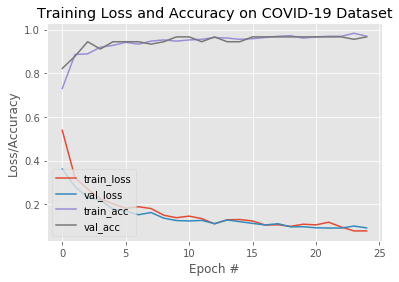

[INFO] saving COVID-19 detector model...
[INFO] compiling model...VGG19
[INFO] training head...
Epoch 1/25
45/45 [==============================] - 74s 2s/step - loss: 0.6062 - accuracy: 0.7056 - val_loss: 0.3842 - val_accuracy: 0.8444
Epoch 2/25
45/45 [==============================] - 73s 2s/step - loss: 0.3522 - accuracy: 0.8861 - val_loss: 0.3465 - val_accuracy: 0.8222
Epoch 3/25
45/45 [==============================] - 70s 2s/step - loss: 0.3152 - accuracy: 0.8750 - val_loss: 0.3022 - val_accuracy: 0.8556
Epoch 4/25
45/45 [==============================] - 70s 2s/step - loss: 0.2731 - accuracy: 0.9111 - val_loss: 0.2763 - val_accuracy: 0.8667
Epoch 5/25
45/45 [==============================] - 72s 2s/step - loss: 0.2956 - accuracy: 0.8861 - val_loss: 0.2457 - val_accuracy: 0.8889
Epoch 6/25
45/45 [==============================] - 70s 2s/step - loss: 0.2549 - accuracy: 0.9139 - val_loss: 0.2557 - val_accuracy: 0.8778
Epoch 7/25
45/45 [==============================] - 77s 2s/step 

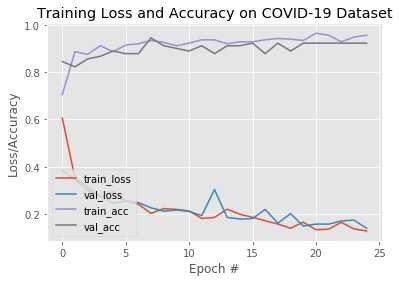

[INFO] saving COVID-19 detector model...


/anaconda3/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


[INFO] compiling model...MobileNet
[INFO] training head...
Epoch 1/25
45/45 [==============================] - 15s 343ms/step - loss: 0.4660 - accuracy: 0.8306 - val_loss: 0.1760 - val_accuracy: 0.9556
Epoch 2/25
45/45 [==============================] - 13s 295ms/step - loss: 0.2521 - accuracy: 0.9056 - val_loss: 0.2277 - val_accuracy: 0.8667
Epoch 3/25
45/45 [==============================] - 13s 295ms/step - loss: 0.2069 - accuracy: 0.9333 - val_loss: 0.4965 - val_accuracy: 0.7333
Epoch 4/25
45/45 [==============================] - 13s 298ms/step - loss: 0.1647 - accuracy: 0.9556 - val_loss: 0.4905 - val_accuracy: 0.7667
Epoch 5/25
45/45 [==============================] - 14s 313ms/step - loss: 0.1691 - accuracy: 0.9389 - val_loss: 0.8056 - val_accuracy: 0.7111
Epoch 6/25
45/45 [==============================] - 13s 298ms/step - loss: 0.1506 - accuracy: 0.9611 - val_loss: 0.4119 - val_accuracy: 0.7778
Epoch 7/25
45/45 [==============================] - 12s 277ms/step - loss: 0.1127 -

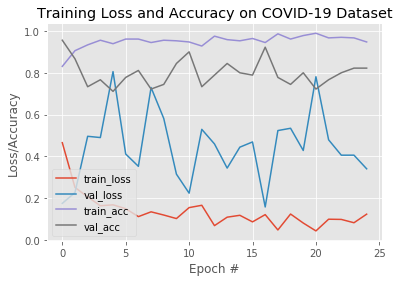

[INFO] saving COVID-19 detector model...
[INFO] compiling model...InceptionV3
[INFO] training head...
Epoch 1/25
45/45 [==============================] - 24s 522ms/step - loss: 0.4708 - accuracy: 0.8028 - val_loss: 2.2949 - val_accuracy: 0.6444
Epoch 2/25
45/45 [==============================] - 23s 516ms/step - loss: 0.4038 - accuracy: 0.8417 - val_loss: 1.0362 - val_accuracy: 0.6556
Epoch 3/25
45/45 [==============================] - 23s 505ms/step - loss: 0.3698 - accuracy: 0.8639 - val_loss: 0.4486 - val_accuracy: 0.7333
Epoch 4/25
45/45 [==============================] - 21s 467ms/step - loss: 0.3689 - accuracy: 0.8417 - val_loss: 1.1995 - val_accuracy: 0.6556
Epoch 5/25
45/45 [==============================] - 23s 506ms/step - loss: 0.2298 - accuracy: 0.9306 - val_loss: 1.2948 - val_accuracy: 0.6667
Epoch 6/25
45/45 [==============================] - 23s 518ms/step - loss: 0.3024 - accuracy: 0.8833 - val_loss: 1.8875 - val_accuracy: 0.6444
Epoch 7/25
45/45 [======================

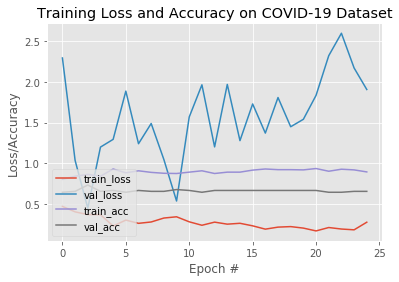

[INFO] saving COVID-19 detector model...


/anaconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


[INFO] compiling model...ResNet50
[INFO] training head...
Epoch 1/25
45/45 [==============================] - 47s 1s/step - loss: 0.7296 - accuracy: 0.7639 - val_loss: 1.1052 - val_accuracy: 0.3556
Epoch 2/25
45/45 [==============================] - 47s 1s/step - loss: 0.2623 - accuracy: 0.9028 - val_loss: 1.3546 - val_accuracy: 0.3556
Epoch 3/25
45/45 [==============================] - 43s 965ms/step - loss: 0.2972 - accuracy: 0.8722 - val_loss: 1.8326 - val_accuracy: 0.3556
Epoch 4/25
45/45 [==============================] - 44s 986ms/step - loss: 0.2035 - accuracy: 0.9167 - val_loss: 1.9569 - val_accuracy: 0.3556
Epoch 5/25
45/45 [==============================] - 43s 951ms/step - loss: 0.1827 - accuracy: 0.9333 - val_loss: 2.1565 - val_accuracy: 0.3556
Epoch 6/25
45/45 [==============================] - 41s 917ms/step - loss: 0.1570 - accuracy: 0.9389 - val_loss: 1.8814 - val_accuracy: 0.3556
Epoch 7/25
45/45 [==============================] - 44s 975ms/step - loss: 0.1700 - accura

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       covid       0.36      1.00      0.52        32
      normal       0.00      0.00      0.00        58

   micro avg       0.36      0.36      0.36        90
   macro avg       0.18      0.50      0.26        90
weighted avg       0.13      0.36      0.19        90

[[32  0]
 [58  0]]
acc: 0.3556
sensitivity: 1.0000
specificity: 0.0000


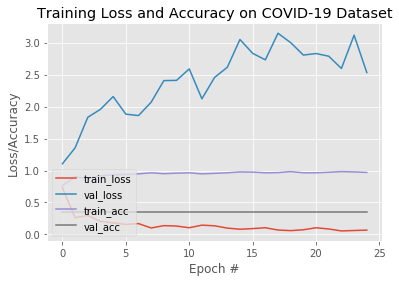

[INFO] saving COVID-19 detector model...
[INFO] compiling model...Xception
[INFO] training head...
Epoch 1/25
45/45 [==============================] - 61s 1s/step - loss: 0.5385 - accuracy: 0.7639 - val_loss: 0.4496 - val_accuracy: 0.8222
Epoch 2/25
45/45 [==============================] - 54s 1s/step - loss: 0.3811 - accuracy: 0.8806 - val_loss: 0.3335 - val_accuracy: 0.9111
Epoch 3/25
45/45 [==============================] - 52s 1s/step - loss: 0.2982 - accuracy: 0.9222 - val_loss: 0.4395 - val_accuracy: 0.8778
Epoch 4/25
45/45 [==============================] - 47s 1s/step - loss: 0.3037 - accuracy: 0.8917 - val_loss: 0.6142 - val_accuracy: 0.8556
Epoch 5/25
45/45 [==============================] - 55s 1s/step - loss: 0.2515 - accuracy: 0.9111 - val_loss: 1.0991 - val_accuracy: 0.7444
Epoch 6/25
45/45 [==============================] - 57s 1s/step - loss: 0.3006 - accuracy: 0.9167 - val_loss: 0.9420 - val_accuracy: 0.7556
Epoch 7/25
45/45 [==============================] - 58s 1s/st

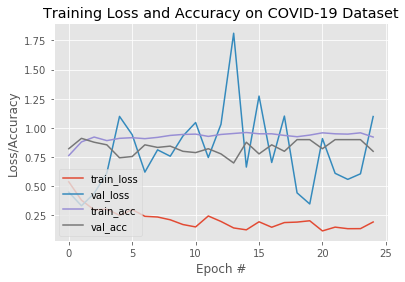

[INFO] saving COVID-19 detector model...


In [7]:
model = ['VGG16','VGG19','MobileNet','InceptionV3','ResNet50','Xception']

# initialize the training data augmentation object
trainAug = ImageDataGenerator(rotation_range=15,fill_mode="nearest")

for model_str in model:
    
#    model = model_picker(model)
    
    # place the head FC model on top of the base model (this will become
    # the actual model we will train)
    
    baseModel = model_picker(model_str)
    
    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(64, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(2, activation="softmax")(headModel)
    
    model = Model(inputs=baseModel.input, outputs=headModel)
    
    # loop over all layers in the base model and freeze them so they will
    # *not* be updated during the first training process
    for layer in baseModel.layers:
        layer.trainable = False
        
    # compile our model
    INIT_LR = 1e-3
    EPOCHS = 25
    BS = 8
    
    print("[INFO] compiling model..."+model_str)
    opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
    model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
    
    # train the head of the network
    print("[INFO] training head...")
    H = model.fit_generator(
        trainAug.flow(trainX, trainY, batch_size=BS),
        steps_per_epoch=len(trainX) // BS,
        validation_data=(testX, testY),
        validation_steps=len(testX) // BS,
        epochs=EPOCHS)
    
    # make predictions on the testing set
    print("[INFO] evaluating network...")
    predIdxs = model.predict(testX, batch_size=BS)
    
    
    # for each image in the testing set we need to find the index of the
    # label with corresponding largest predicted probability
    predIdxs = np.argmax(predIdxs, axis=1)
    
    # show a nicely formatted classification report
    print(classification_report(testY.argmax(axis=1), predIdxs,target_names=lb.classes_))
    
    
    # compute the confusion matrix and and use it to derive the raw
    # accuracy, sensitivity, and specificity
    
    cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
    total = sum(sum(cm))
    acc = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
    
    # show the confusion matrix, accuracy, sensitivity, and specificity
    print(cm)
    print("acc: {:.4f}".format(acc))
    print("sensitivity: {:.4f}".format(sensitivity))
    print("specificity: {:.4f}".format(specificity))
    
    # plot the training loss and accuracy
    N = EPOCHS
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy on COVID-19 Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig('plot')
    plt.show()
    
    # serialize the model to disk
    print("[INFO] saving COVID-19 detector model...")
    model.save('covid19_model_'+model_str)